In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [4]:
class CircleDataset(Dataset):
    def __init__(self, n_samples=1000):
        
        self.X = np.random.uniform(low=-1.5, high=1.5, size=(n_samples, 2))
        
        
        distance_from_origin = np.sqrt(self.X[:,0]**2 + self.X[:,1]**2)
        
        
        self.y = (distance_from_origin < 1).astype(np.float32)
        
        
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)
        
        
        print(f"Generated {n_samples} samples")
        print(f"Number of points inside circle: {int(self.y.sum())}")
        print(f"Number of points outside circle: {n_samples - int(self.y.sum())}")
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


dataset = CircleDataset(n_samples=1000)

Generated 1000 samples
Number of points inside circle: 331
Number of points outside circle: 669


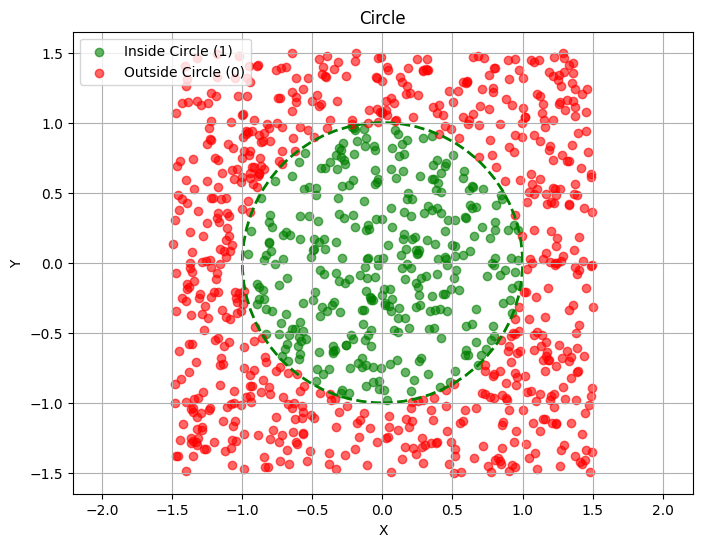

In [9]:
def plot_data(dataset):
    X = dataset.X.numpy()
    y = dataset.y.numpy()
    
    plt.figure(figsize=(8, 6))
    
    # Plot points inside circle (label 1)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Inside Circle (1)', alpha=0.6)
    
    # Plot points outside circle (label 0)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Outside Circle (0)', alpha=0.6)
    
    # Draw the actual circle for reference
    circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Circle')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

plot_data(dataset)

In [18]:

class Circleclassify(nn.Module):
    def __init__(self):
        super(Circleclassify, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(5, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x_squared = x[:, 0:1]**2
        y_squared = x[:, 1:2]**2
        distance = torch.sqrt(x_squared + y_squared)

        eng_feat = torch.cat([x, x_squared, y_squared, distance], dim=1)
        out = self.network(eng_feat) 
        return out


model = Circleclassify()
print(model)

Circleclassify(
  (network): Sequential(
    (0): Linear(in_features=5, out_features=3, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
